In [1]:
import pycaret
pycaret.__version__

'3.2.0'

## Load Data

In [2]:
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Main

Setup ➡️ Compare Models ➡️ Analyze Model ➡️ Prediction

In [3]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

### Setup

In [4]:
exp.setup(data, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


### Compare Models

In [5]:
exp.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [6]:
best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8046,0.5602,0.7208,0.6279,0.4641,0.4736,0.4840
ridge,Ridge Classifier,0.7670,0.0000,0.5497,0.7235,0.6221,0.4581,0.4690,0.0060
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0040
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.0370
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.3570
catboost,CatBoost Classifier,0.7410,0.7993,0.5278,0.6630,0.5851,0.4005,0.4078,0.2980
gbc,Gradient Boosting Classifier,0.7373,0.7918,0.5550,0.6445,0.5931,0.4013,0.4059,0.0200
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.0130
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.0260
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0050


In [7]:
best = exp.tune_model(best, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8704,0.8992,0.7368,0.8750,0.8000,0.7051,0.7108
1,0.8148,0.7850,0.6316,0.8000,0.7059,0.5735,0.5820
2,0.8704,0.9353,0.6842,0.9286,0.7879,0.6976,0.7145
3,0.7222,0.7744,0.4737,0.6429,0.5455,0.3520,0.3605
4,0.8704,0.9113,0.6842,0.9286,0.7879,0.6976,0.7145
5,0.6481,0.6662,0.3684,0.5000,0.4242,0.1792,0.1835
6,0.7407,0.8030,0.5789,0.6471,0.6111,0.4176,0.4190
7,0.7736,0.8746,0.4444,0.8000,0.5714,0.4342,0.4688
8,0.6604,0.6778,0.4444,0.5000,0.4706,0.2219,0.2227


[I 2024-02-29 13:27:57,561] Searching the best hyperparameters using 537 samples...
[I 2024-02-29 13:28:00,065] Finished hyperparameter search!


### Analyze Model

In [8]:
# exp.evaluate_model(best)

In [9]:
# help(exp.plot_model)

#### Setting

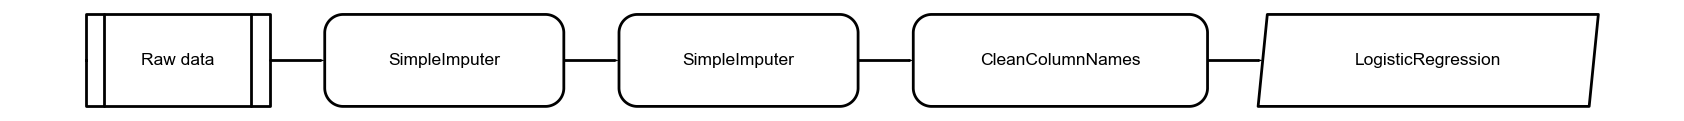

In [10]:
exp.plot_model(best, plot = 'pipeline')

In [11]:
exp.plot_model(best, plot = 'parameter')

,Parameters
C,7.205210237716869
class_weight,{}
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


#### Learning

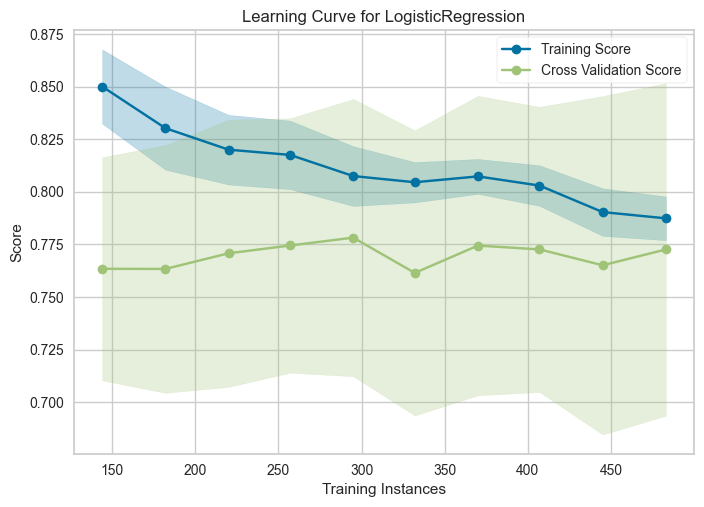

In [12]:
exp.plot_model(best, plot = 'learning')

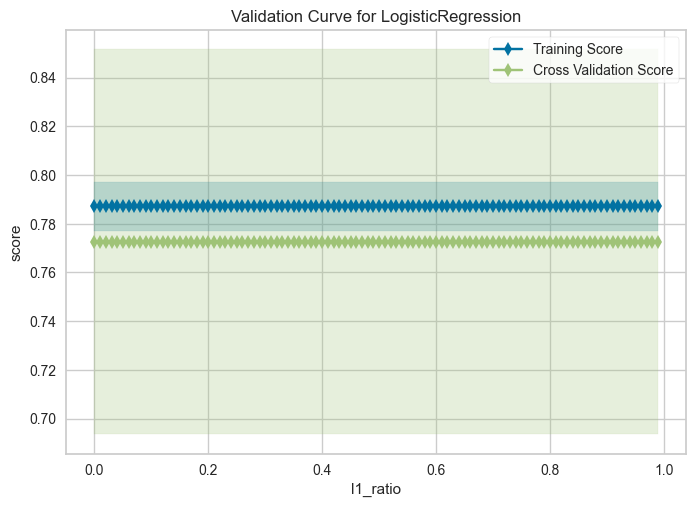

In [13]:
exp.plot_model(best, plot = 'vc')

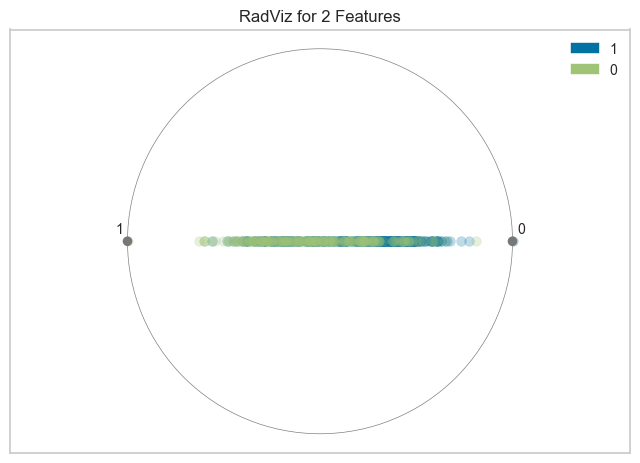

In [14]:
exp.plot_model(best, plot = 'dimension')

#### Model Evaluation

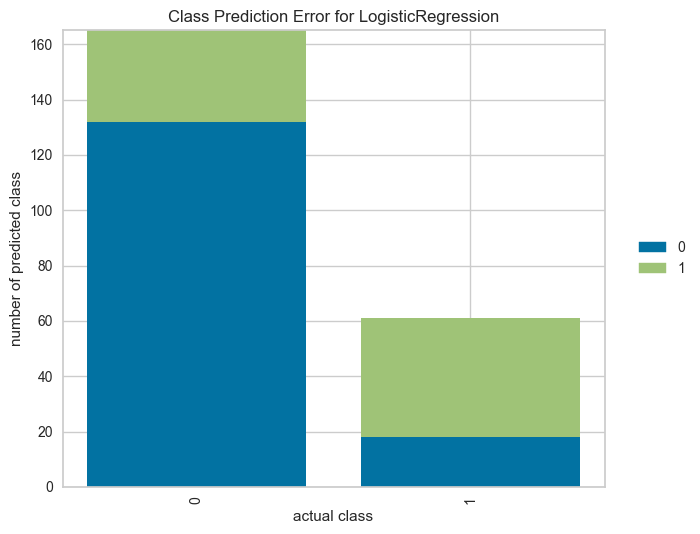

In [15]:
exp.plot_model(best, plot = 'error')

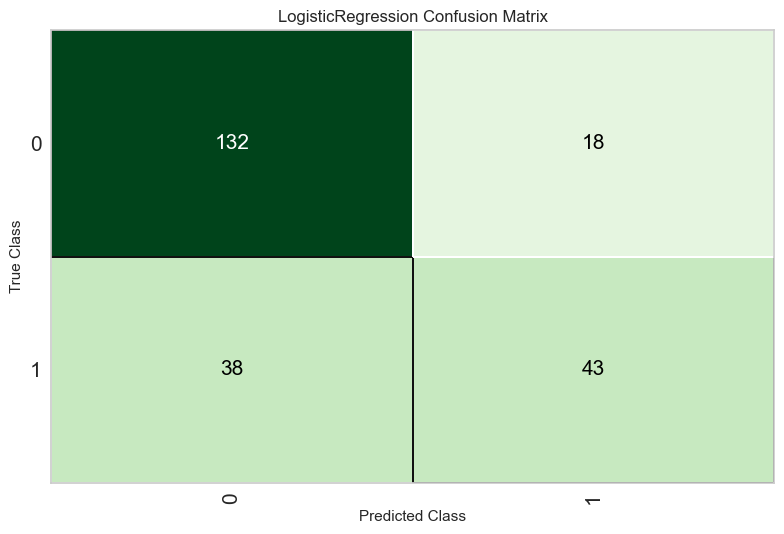

In [16]:
exp.plot_model(best, plot = 'confusion_matrix')

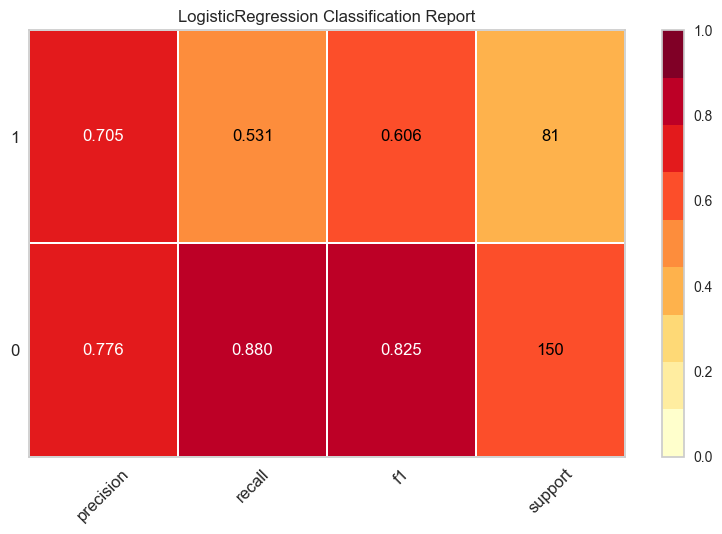

In [17]:
exp.plot_model(best, plot = 'class_report')

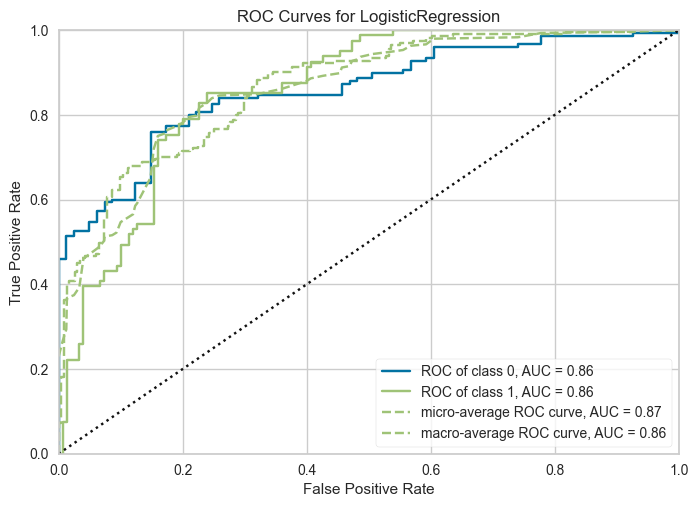

In [18]:
exp.plot_model(best, plot = 'auc')

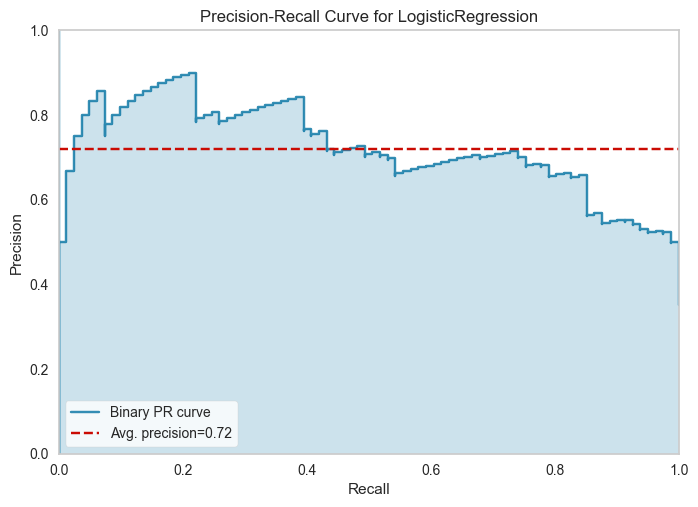

In [19]:
exp.plot_model(best, plot = 'pr')

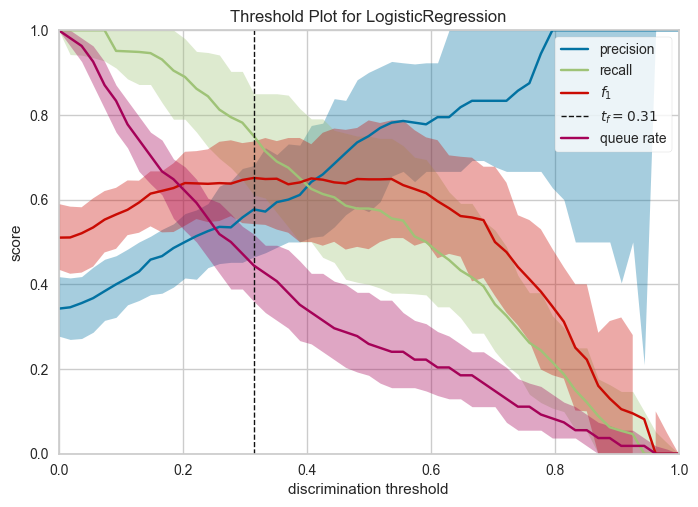

In [20]:
exp.plot_model(best, plot = 'threshold')

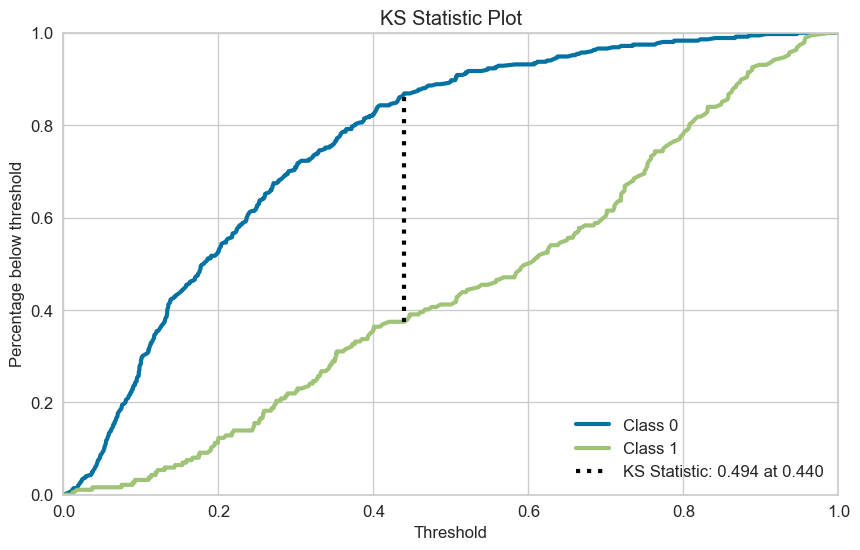

In [21]:
exp.plot_model(best, plot = 'ks')

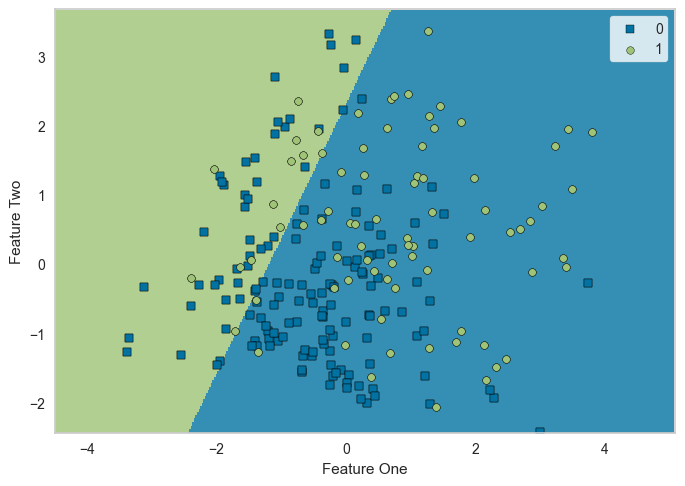

In [22]:
exp.plot_model(best, plot = 'boundary')

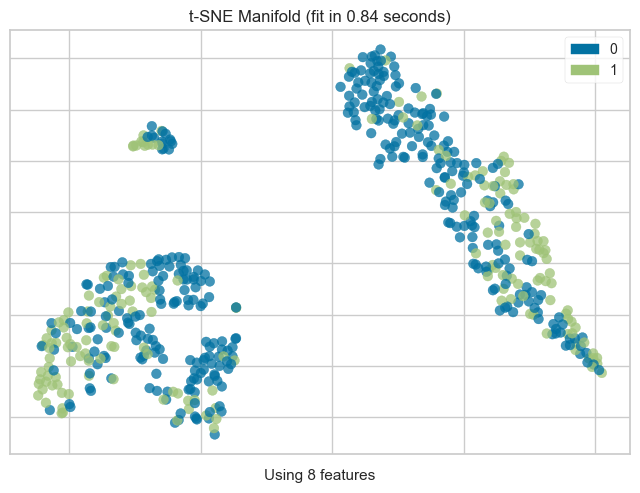

In [23]:
exp.plot_model(best, plot = 'manifold')

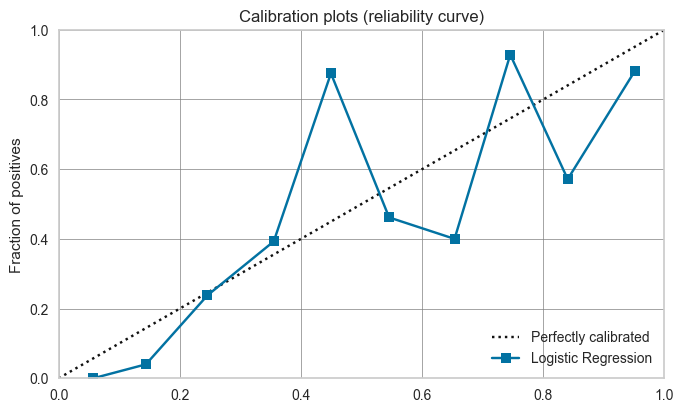

In [24]:
exp.plot_model(best, plot = 'calibration')

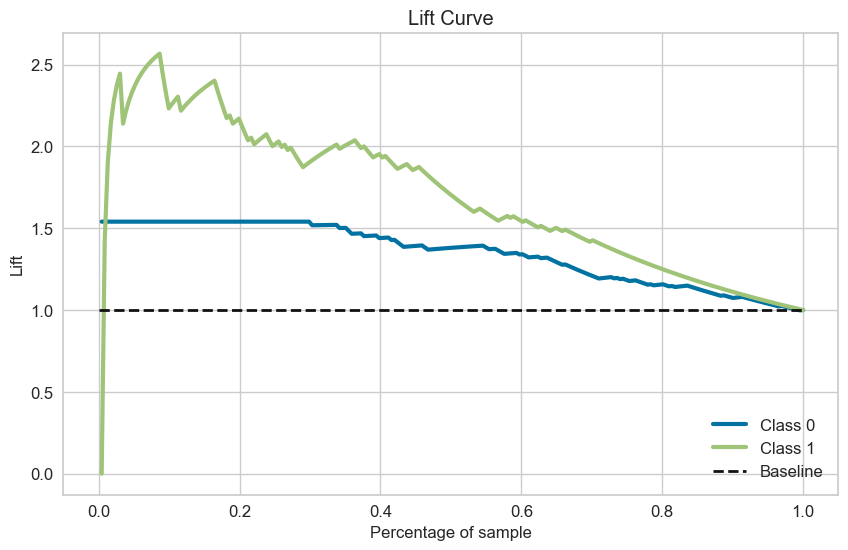

In [25]:
exp.plot_model(best, plot = 'lift')

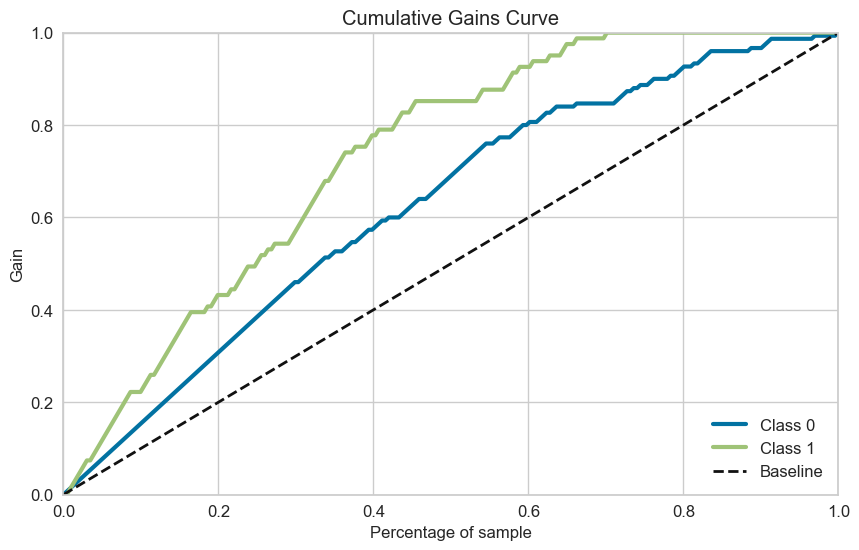

In [26]:
exp.plot_model(best, plot = 'gain')

In [27]:
# exp.plot_model(best, plot = 'tree')

#### Features Evaluation

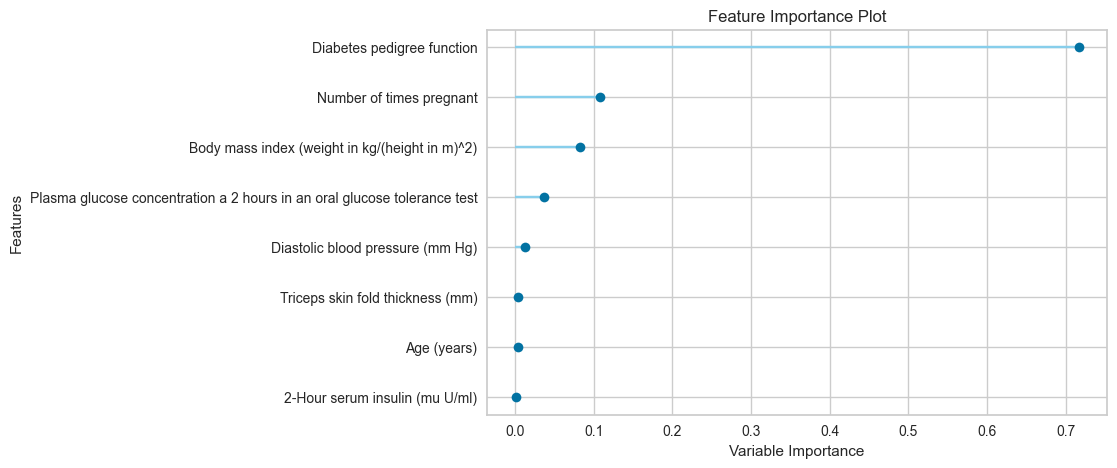

In [28]:
exp.plot_model(best, plot = 'feature')

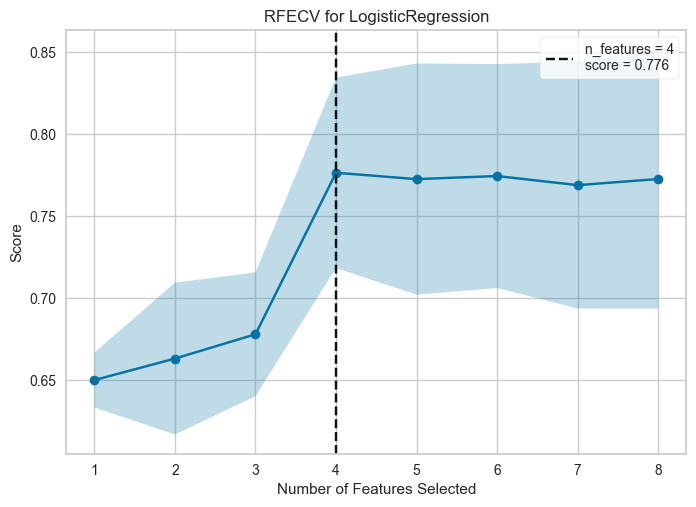

In [29]:
exp.plot_model(best, plot = 'rfe')

## Prediction

In [30]:
holdout_pred = exp.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8579,0.5309,0.7049,0.6056,0.4356,0.4447


In [31]:
holdout_pred.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8064
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9657
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9411
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.8038
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6405


In [32]:
new_data = data.copy()
new_data.drop('Class variable', axis=1, inplace=True)
new_data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [33]:
new_data_pred = exp.predict_model(best, data = new_data)
new_data_pred.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,0.6958
1,1,85,66,29,0,26.600000,0.351,31,0,0.9426
2,8,183,64,0,0,23.299999,0.672,32,1,0.8014
3,1,89,66,23,94,28.100000,0.167,21,0,0.9467
4,0,137,40,35,168,43.099998,2.288,33,1,0.8578
